# 감성 분류

- 분류 모델의 가장 대표적인 활용 방법 중 하나

- 텍스트 데이터를 긍정 또는 부정으로 나누어 분류하는 것

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# 맛집 상세 페이지 url 정보 크롤링

In [9]:
url = "https://map.kakao.com/"

In [13]:
driver = webdriver.Chrome()

driver.get(url)
driver.implicitly_wait(3)

# 검색어 창 찾아용
search_box = driver.find_element(By.CSS_SELECTOR, "input.tf_keyword")
search_box.send_keys("신촌 맛집")

# 엔터 누르셈
search_box.send_keys(Keys.ENTER)

# 기다려
time.sleep(1)

# 셀레니움에서 url 뜻어올것임~~!~!~!
soup = BeautifulSoup(driver.page_source, "lxml")
moreviews = soup.select("a.moreview")

In [14]:
print(moreviews)

[<a class="moreview" data-id="moreview" href="https://place.map.kakao.com/15937430" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/26976526" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/26615188" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/8754048" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/20225173" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/69756475" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/1165755646" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/8122805" target="_blank">상세보기</a>, <a class="moreview" data-id="moreview" href="https://place.map.kakao.com/1538767777" target="_blank">상세보기</a>, <a class="morevi

In [16]:
moreviews[0].get("href")

'https://place.map.kakao.com/15937430'

In [19]:
# 크롤링 할 페이지 리스트 생성
page_urls = []

for more in moreviews:
    page = more.get("href")
    page_urls.append(page + "#review")



page_urls

['https://place.map.kakao.com/15937430#review',
 'https://place.map.kakao.com/26976526#review',
 'https://place.map.kakao.com/26615188#review',
 'https://place.map.kakao.com/8754048#review',
 'https://place.map.kakao.com/20225173#review',
 'https://place.map.kakao.com/69756475#review',
 'https://place.map.kakao.com/1165755646#review',
 'https://place.map.kakao.com/8122805#review',
 'https://place.map.kakao.com/1538767777#review',
 'https://place.map.kakao.com/7892863#review',
 'https://place.map.kakao.com/1536467186#review',
 'https://place.map.kakao.com/8571672#review',
 'https://place.map.kakao.com/15718891#review',
 'https://place.map.kakao.com/19243601#review',
 'https://place.map.kakao.com/27389671#review']

In [ ]:
# headers = {
#     "user_Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36"
# }

# 막혀서 어쩔수 없다!

In [18]:
# 셀레니움 돌리자

In [47]:
driver = webdriver.Chrome()


review_list = []
star_list = []

for url in page_urls:
    driver.get(url)
    driver.implicitly_wait(3)
    
    # 기다려
    time.sleep(1)
    
    # 셀레니움에서 url 뜻어올것임~~!~!~!
    soup = BeautifulSoup(driver.page_source, "lxml")
    doms = soup.select("li div.inner_review")
    
    for i in doms:
        try:
            review_list.append(i.select_one("p.desc_review").text.strip())
            
        except:
            review_list.append("")
            
        star_list.append(i.select_one("div.info_grade span.screen_out:nth-of-type(2)").text)


In [48]:
print(review_list)
print(star_list)

['', '비싸기만 비싸고, 뭘먹었는지도 모르겠고, 특별히 맛있는지도 모르겠고 술만 취한다~', '', '원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만, 운이 나빴는지(?) 가르치듯 말씀하시는 담당 여사님 태도가 너무 읭스러웠습니다.\n2층에서 식사했는데, 갈비탕은 1층에서만 되... 더보기', '', '불친절하고 식사중인데 락스청소하네요 이럴거면 마감시간에 손님받지말던가', '팁을 거의 반강요하네요. 불쾌합니다.', '가성비 맛집이었는데 어느 순간 가격을 올리더니 이제는 팁도 받네요...', '일요일 늦은 점심 2시반 3층 갈비층 방문\n친절하고 갈비도 괜찮았음\n1층 갈비탕과 윗층은 아예 별개로 운영하는 듯하고 3층에선 갈비탕 주문불가', '', '유명하다고\n갈비 윗부분은 말라서 질기고\n밥도 퍼놓은지 오래되... 더보기', '근방에서 무난한 갈비탕~', '직원분에따라 응대와 친절함은 복불복입니다. 가족단위로 갈 수 있는 룸과 좌석이 많다는 것 이외에는 장점을 잘 모르겠습니다.', '갈비탕이 괜찮은편 입니다', '', '', '오랫동안 다녔던 음식점이었지만 오늘처럼 푸대접 받은 날은 처음입니다\n손님은 왕이라는 말은 사라진지 오래고 바쁘니 반찬통 갖다주며 직접 퍼 먹으라는... 더보기', '직원 싸가지 없음 공기밥 2개 추가 주문했더니 밥 없다고 하나만 먹으라고 함. 보통 양해를 먼저 구하지 않나? 지가 뭔데 이것만 먹어라 마라함', '', '아기용 음식없음(청양고추가 들어가있지 않는 된장찌개는 제공 불가하다고.. 보다 못한 이모님이 냉면 국물을 조금... 더보기', '새로 나온 메뉴, 화이트라구도  굿', '맛있어요 오래 영업해주세요', '라구식당\n가게에 날벌레가 좀 있지만\n직원 친절하고 라... 더보기', '아무리 시간이 지나도 맛이 그대로인 몇 안되는 신촌 식당 중 하나,,, 라구소스 깊은 맛과 고기 양이 말이안됨\n근데 옛날이나 지금이나 가격이 좀 부담되긴함', '라구파스타 맛있네용ㅎㅎ', '라구파스타와 라자냐가 메인인 식당. (라자

In [49]:
print(len(review_list))
print(len(star_list))

300
300


In [50]:
df = pd.DataFrame(
    {"score" : star_list, "review" : review_list}
)

In [51]:
df.head()

,score,review
0,4.0,
1,1.0,"비싸기만 비싸고, 뭘먹었는지도 모르겠고, 특별히 맛있는지도 모르겠고 술만 취한다~"
2,1.0,
3,2.0,"원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만, 운이 나빴는지(?) 가르..."
4,4.0,


In [52]:
df.shape

(300, 2)

In [53]:
df["score"] = df["score"].astype(float)

In [55]:
df.dtypes

score     float64
review     object
dtype: object

# 기준 : 별점 4점 이상은 긍정 그 외에는 부정 리뷰라고 보자

In [56]:
df["y"] = df["score"].map(lambda x : 1 if x > 3 else 0)

In [57]:
df.head()

,score,review,y
0,4.0,,1
1,1.0,"비싸기만 비싸고, 뭘먹었는지도 모르겠고, 특별히 맛있는지도 모르겠고 술만 취한다~",0
2,1.0,,0
3,2.0,"원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만, 운이 나빴는지(?) 가르...",0
4,4.0,,1


In [58]:
df["y"].value_counts()

y
1    222
0     78
Name: count, dtype: int64

# 텍스트 전처리

In [59]:
# 한글 이외의 것들은 모두 빼겠다

In [61]:
def text_cleaning(text:str):
    '''
    텍스트 정제 함수
    한글 이외의 문자는 전부 제거
    '''
    han = re.compile("[^ ㄱ-ㅣ 가-힣]+") # 정규표현식으로 체크한디야~!~!~!~!~
    # 한글 이외의 문자들 제거
    text = han.sub(" ", text)

    return text

In [63]:
df["ko_text"] = df["review"].map(text_cleaning)

In [64]:
df.head()

,score,review,y,ko_text
0,4.0,,1,
1,1.0,"비싸기만 비싸고, 뭘먹었는지도 모르겠고, 특별히 맛있는지도 모르겠고 술만 취한다~",0,비싸기만 비싸고 뭘먹었는지도 모르겠고 특별히 맛있는지도 모르겠고 술만 취한다
2,1.0,,0,
3,2.0,"원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만, 운이 나빴는지(?) 가르...",0,원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만 운이 나빴는지 가르치듯...
4,4.0,,1,


In [68]:
# 빈칸 제거 할끄야~~~~~~~~~~~~~~
df = df[df["ko_text"].str.len()>0]
df.head()

,score,review,y,ko_text
1,1.0,"비싸기만 비싸고, 뭘먹었는지도 모르겠고, 특별히 맛있는지도 모르겠고 술만 취한다~",0,비싸기만 비싸고 뭘먹었는지도 모르겠고 특별히 맛있는지도 모르겠고 술만 취한다
3,2.0,"원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만, 운이 나빴는지(?) 가르...",0,원래 이런 가족식사용 식당에 큰 기대를 하고 가진 않지만 운이 나빴는지 가르치듯...
5,1.0,불친절하고 식사중인데 락스청소하네요 이럴거면 마감시간에 손님받지말던가,0,불친절하고 식사중인데 락스청소하네요 이럴거면 마감시간에 손님받지말던가
6,1.0,팁을 거의 반강요하네요. 불쾌합니다.,0,팁을 거의 반강요하네요 불쾌합니다
7,2.0,가성비 맛집이었는데 어느 순간 가격을 올리더니 이제는 팁도 받네요...,0,가성비 맛집이었는데 어느 순간 가격을 올리더니 이제는 팁도 받네요


# 텍스트 임베딩 해야함

- 텍스트 데이터를 연산가능하게 변경

### TF-IDF(Term Frequency-Inverse Document Frequency)

- 단어의 빈도와 역 문서 빈도를 사용하여 각 단어들의 중요도를 가중치로 주는 방법
    - TF : 1개의 문서 내에서 특정 단어의 등장 빈도
    - DF : 특정 단어가 등장한 문서의 수
    - IDF : DF에 반비례하는 수

- 다른 문서 들에서는 많이 등장하지 않았지만 현재 문서에서는 많이 등장하는 단어를 의미
    - 해당 단어가 현재 문서에서 얼마나 중요한지를 계산하는 방법

In [71]:
x = df["ko_text"]
y = df["y"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify  = y,
    random_state = 24
)

In [76]:
tfidf = TfidfVectorizer()

In [77]:
tf_train = tfidf.fit_transform(x_train)
tf_test = tfidf.transform(x_test)

In [78]:
tf_train.shape

(170, 1224)

# 모델 훈련

In [79]:
logi = LogisticRegression()

In [80]:
logi.fit(tf_train,y_train)

LogisticRegression()

In [81]:
pred = logi.predict(tf_test)

In [82]:
proba = logi.predict_proba(tf_test)[:, 1]

In [83]:
proba

array([0.7621124 , 0.7367848 , 0.71384992, 0.75955885, 0.76291363,
       0.65617721, 0.72511912, 0.6877169 , 0.72316557, 0.76084076,
       0.75498109, 0.67507949, 0.7352927 , 0.66593327, 0.71356911,
       0.75421701, 0.72873395, 0.73594266, 0.7682773 , 0.73115887,
       0.67684946, 0.74561698, 0.69410398, 0.78340179, 0.69817203,
       0.71384992, 0.71384992, 0.71384992, 0.71384992, 0.73191075,
       0.78885702, 0.75214443, 0.64666064, 0.64489897, 0.76600676,
       0.73759267, 0.72455489, 0.68594145, 0.71384992, 0.81165786,
       0.73332672, 0.69448843, 0.67276078, 0.76477123, 0.70758215,
       0.65090564, 0.75194703, 0.70556493, 0.70244556, 0.81165786,
       0.70921729, 0.7357455 , 0.72583686, 0.74511761, 0.75144138,
       0.65008934, 0.73109102, 0.75121587, 0.73407221, 0.77957259,
       0.81424047, 0.73219412, 0.63421501, 0.68267292, 0.71384992,
       0.74446957, 0.84521063, 0.71044406, 0.75533949, 0.81762374,
       0.68469226, 0.74511761, 0.74790887])

In [84]:
logi.score(tf_test, y_test)

0.7123287671232876

In [85]:
print(accuracy_score(y_test, pred))

0.7123287671232876


In [86]:
print(f1_score(y_test, pred))

0.832


In [88]:
comat = confusion_matrix(y_test, pred)

In [89]:
comat

array([[ 0, 21],
       [ 0, 52]])

# 모델 최적화

In [96]:
df["y"].value_counts()

y
1    174
0     69
Name: count, dtype: int64

In [97]:
# 1: 1 로 최적화 해봐
# 전체 랜덤하게 78개 뽑아
post_idx = df[df["y"] == 1].sample(69, random_state = 24).index.tolist() # 

In [98]:
neg_idx = df[df["y"] == 0].index.tolist()

In [100]:
# 반반 뽑아야지~~~
random_idx = post_idx + neg_idx

sample_x = x[random_idx]
sample_y = df["y"][random_idx]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.3,
    stratify = sample_y,
    random_state = 24
)

In [112]:
# 문자열이니까 tffid 이용해서 변환해줘야죵~~~~~~~~~~
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)


# 분석모델 만들기

In [113]:
# 로지스틱 회귀써서 모델로 구축할것임~~!~!~!!~~!~!~!!
logi = LogisticRegression()
logi.fit(tfidf_train, y_train)

LogisticRegression()

In [118]:
tfidf_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 104 stored elements and shape (42, 768)>

In [119]:
pred = logi.predict(tfidf_test)
proba = logi.predict_proba(tfidf_test)[:, 1]

In [120]:
proba

array([0.38829565, 0.49704365, 0.55219564, 0.40898914, 0.49704365,
       0.52463131, 0.50043705, 0.49637947, 0.44738692, 0.50060172,
       0.4185763 , 0.48442117, 0.54336873, 0.55697149, 0.49704365,
       0.46181823, 0.49704365, 0.51142213, 0.49704365, 0.48120711,
       0.46234399, 0.48840593, 0.63422079, 0.44298209, 0.63422079,
       0.49704365, 0.48911374, 0.53770375, 0.45336668, 0.44181831,
       0.52538103, 0.46993221, 0.49289877, 0.44716633, 0.57074259,
       0.44701674, 0.56937397, 0.39618504, 0.63422079, 0.44701674,
       0.53780837, 0.46621369])

In [116]:
comat2 = confusion_matrix(y_test, pred)

In [117]:
comat2

array([[16,  5],
       [11, 10]])

# 조지긴했으나 아까보단 나아졌다~~~~~~~~

In [123]:
pd.DataFrame(
    {
        "text" : x_test,
        "pred" :pred ,
        "ans" : y_test,
    }
)

,text,pred,ans
272,맛은 있습니다 하지만 어떤 날은 국물이 밍밍한 날도 있어서 조금은 복불복인 경향성...,0,0
104,괜찮습니다,0,1
43,밑에 보니까 별점 알바 너무 많다 두 개 시키면 하나 다 먹고 후식 먹을 때쯤 하...,1,0
176,칼국수는 명 이상 먹기에 좋은 음식 둘이서 먹으니까 된장국만 미치게 먹는 느낌이...,0,0
197,사진은 백짬뽕이지만 매운걸 좋아한다면 불낙짬뽕이 근본,0,1
277,초계국수 먹으러 갔어요 손님 대부분이 외국인이고 닭한마리 먹다보니 초계국수는 별로일...,1,1
264,대안이 너무 많다,1,0
37,이제 어디 가서 라구소스 먹어봤다고 할 수 있음,0,1
74,무난,0,0
236,든든하게 먹기 좋고 딸기 막걸리가 개맛있음 기본 안주도 너무너무 좋음 단점은 ...,1,0


# 테스트

In [126]:
query = tfidf.transform(["이게 미쳤나! 정말 좋다~~"])
logi.predict(query)

array([1])

# 키워드 분석

- 로지스틱 회귀 모델의 피처 영향력으로 가장 높은 단어찾기

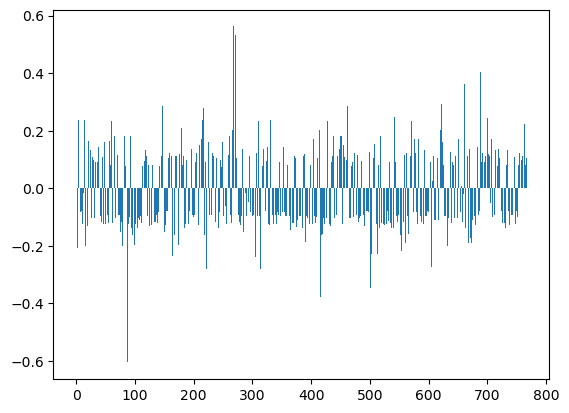

In [128]:
plt.figure()

plt.bar(range(len(logi.coef_.flatten())), logi.coef_.flatten())
plt.show()

In [130]:
# 회귀 모델의 계수를 내림차순으로 정렬
coef_pos_idx = sorted(((value, idx) for idx, value in enumerate(logi.coef_.flatten())), reverse = True)

In [132]:
logi.coef_

array([[-0.12324481,  0.23285668, -0.20872599,  0.03836748,  0.236091  ,
        -0.16607754,  0.14200734, -0.08108881,  0.17219888, -0.07835264,
        -0.11709015, -0.12495869, -0.0182621 , -0.12288428,  0.23712953,
         0.12182895, -0.19940876, -0.1292715 ,  0.08969312, -0.12969598,
         0.14200734,  0.16337775,  0.11343697, -0.11878273,  0.1335963 ,
         0.11116603, -0.10326619, -0.20587533,  0.10822   ,  0.09964715,
        -0.10305192, -0.10305192, -0.13728656,  0.09219996,  0.09219996,
         0.29911216,  0.09219996,  0.23285668,  0.14200734,  0.13364124,
         0.11116603, -0.09656226, -0.12317754, -0.11709015, -0.09656226,
         0.10822   , -0.12324481,  0.15127914,  0.1614067 , -0.12324481,
        -0.12324481, -0.07835264, -0.09342865, -0.09342865, -0.09342865,
        -0.12054849,  0.13544431,  0.16337775,  0.08185258,  0.08185258,
         0.23285668, -0.11066943, -0.12125826,  0.1170919 , -0.10326619,
         0.18304988, -0.19102866, -0.10176524,  0.1

In [133]:
coef_pos_idx[:5]

[(np.float64(0.5621927639727939), 268),
 (np.float64(0.5309993128719409), 271),
 (np.float64(0.40331960461864697), 688),
 (np.float64(0.40331960461864697), 258),
 (np.float64(0.36099104497643875), 661)]

In [135]:
# 상위 20개 긍정 형태소
for value, idx in coef_pos_idx[:20]:
    print(tfidf.get_feature_names_out()[idx], value)

맛있어요 0.5621927639727939
맛있음 0.5309993128719409
최애찻집 0.40331960461864697
맛잇음 0.40331960461864697
진짜 0.36099104497643875
샐러드 0.32034195502299634
깔끔하고 0.3030782468441888
갈비탕 0.2991121635613559
맛있고 0.2967070821334321
좋아요 0.2942683766589516
아늑하고 0.28714791257530725
논현점보다 0.2851900274113225
넓습니다 0.2851900274113225
라자냐 0.27887191976287345
재방문 0.2520470476086432
먹었습니다 0.24781583730940374
음료가 0.24709328160331814
친절하고 0.24243774298493254
가고 0.23712952825053868
밀크티푸딩 0.23642064806270066


In [137]:
for value, idx in coef_pos_idx[:20:-1]:
    print(tfidf.get_feature_names_out()[idx], value)

굳이 -0.6056212352164239
맛은 -0.4303912159363025
손님 -0.37892278997415674
없음 -0.3453644946872887
중국집 -0.3167950268268811
짬뽕 -0.29109987663096004
과대평가 -0.2820065698528028
랭크급 -0.2820065698528028
리뉴얼 -0.2820065698528028
맛싸가지업게별로임 -0.2820065698528028
맛있었음 -0.2820065698528028
무난하게 -0.2820065698528028
싸갖없는종업원 -0.2820065698528028
아쉽 -0.2820065698528028
점점 -0.2726723555806876
많아서 -0.25730431625483857
모르겠고 -0.24049601083842415
맛과 -0.23704099953630853
다른 -0.23524139075532993
마인드 -0.23231161621152055
서비스 -0.23231161621152055
모임은 -0.23025740008396933
여기로 -0.23025740008396933
연세대 -0.23025740008396933
이미 -0.21792240166995142
ㅈㅅ -0.20872599416550547
기대했는데 -0.20872599416550547
본점이라 -0.20872599416550547
홍대점이 -0.20872599416550547
가지튀김 -0.20587533461724009
더보기 -0.20090614418702574
가기에 -0.19940875788207463
교수님이랑 -0.19940875788207463
무난 -0.19940875788207463
좋음 -0.19940875788207463
근데 -0.19685940500985505
달아요 -0.196656674961956
인분 -0.19114327742535578
고기냄새좀났음 -0.1910286564775702
짜장짬뽕다짜서먹기힘들었음 -0.19102865647757